Linear SVM Accuracy: 0.956140350877193
RBF SVM Accuracy: 0.9824561403508771


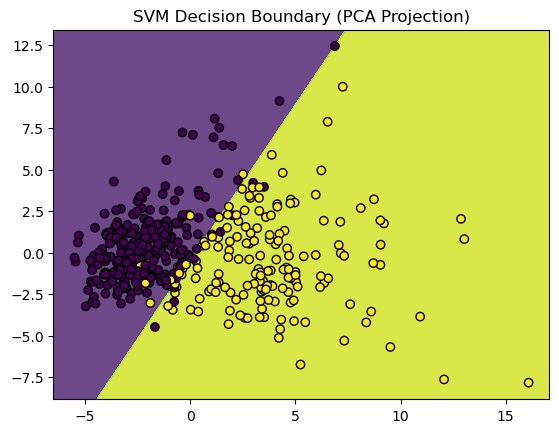

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("breast-cancer.csv")

# Drop ID column if exists
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

# Convert 'diagnosis' column to binary: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear SVM
linear_model = SVC(kernel='linear')
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

# Train RBF SVM with default hyperparameters
rbf_model = SVC(kernel='rbf', C=1, gamma='scale')
rbf_model.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_model.predict(X_test_scaled)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

# Visualize decision boundary using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
model_vis = SVC(kernel='linear')
model_vis.fit(X_pca, y_train)

def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM Decision Boundary (PCA Projection)")
    plt.show()

plot_decision_boundary(X_pca, y_train, model_vis)
